<h1> Features Users </h1>

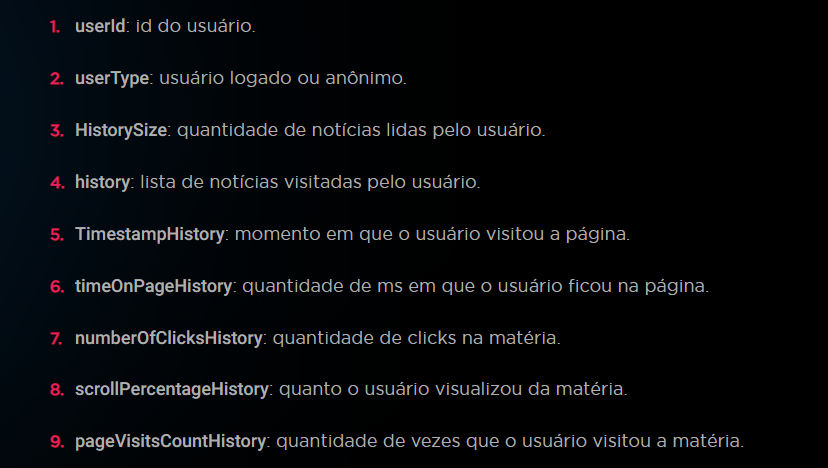

In [2]:
import pandas as pd
import numpy as np
import os
from datetime import datetime, timedelta
import re

In [3]:
# Path handling
os.chdir("c:/Users/gufer/OneDrive/Documentos/FIAP/Fase_05/ML_Engineer_Datathon/")

In [4]:
# Train DF
train_df = pd.DataFrame()

for x in range(1, 7):
    train_path = f"data/challenge-webmedia-e-globo-2023/files/treino/treino_parte{x}.csv"
    df = pd.read_csv(train_path)
    train_df = pd.concat([train_df, df])

train_df.tail()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestampHistory_new
77937,1f127d1d22eb98869642ce218998265e00e48a437c1afc...,Non-Logged,2,"7cfb21ba-5e3a-45ab-a0d8-d2d4baaf8823, d9f5db6a...","1657326235808, 1660067897448","7, 12","47320, 19387","46.63, 25.6","2, 1","1657326235808, 1660067897448"
77938,d7ad044fbee204ef63755977cf4da82ed26d1e15b678e5...,Non-Logged,2,"83e8814f-7de7-4cd9-b616-327008b86f0a, a36c98b5...","1659884923835, 1660163481828","29, 10","40358, 10000","26.22, 50.04","2, 1","1659884923835, 1660163481828"
77939,8c53774379c974721e8108133058e9f99d9d96b6ddefe6...,Non-Logged,2,"93d31414-9969-4bc0-b721-6f73b603f023, 9e792f9d...","1659482565430, 1659484173830","39, 0","430000, 10000","28.1, 9.83","2, 1","1659482565430, 1659484173830"
77940,8bb2e391615bc319e30d769c4d809193662c870cf18f18...,Non-Logged,2,"3230374d-3227-480f-8aad-be40e7918a89, 215e0ef8...","1659762125465, 1659764560346","2, 1","169658, 183309","40.74, 53.26","2, 1","1659762125465, 1659764560346"
77941,4a6c9749763dcddd3d6ca7c2bb184be5f4b0b790194cb5...,Non-Logged,2,"2c8d0162-7a7c-420b-ac35-1f7f1e9f7ba4, a206482d...","1657138632624, 1659647979544","42, 13","70000, 29438","39.45, 61.98","2, 1","1657138632624, 1659647979544"


In [5]:
# Dropping unnecessary column
train_df.drop(columns="timestampHistory_new", inplace=True)

In [6]:
# ============================================================================
# 1) EXPLODIR HISTÓRICO E DEMAIS CAMPOS POR VÍRGULA
# ============================================================================

df_exploded = train_df.copy()

# Função auxiliar para converter string de valores em lista de strings
def split_column(series):
    return series.str.split(',')

# Explodindo cada coluna que está em formato string com vírgulas
cols_to_explode = [
    'history', 
    'timestampHistory', 
    'numberOfClicksHistory',
    'timeOnPageHistory',
    'scrollPercentageHistory',
    'pageVisitsCountHistory'
]

for col in cols_to_explode:
    df_exploded[col] = split_column(df_exploded[col])

df_exploded.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,"[c8aab885-433d-4e46-8066-479f40ba7fb2, 68d203...","[1657146417045, 1657146605778, 1657146698738]","[76, 38, 41]","[20380, 21184, 35438]","[50.3, 18.18, 16.46]","[2, 1, 1]"
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,"[3325b5a1-979a-4cb3-82b6-63905c9edbe8, fe8560...","[1656684240278, 1656761266729, 1656761528085...","[7, 80, 2, 1, 7, 62, 26, 44, 4, 4, 1...","[6049, 210489, 8672, 10000, 30000, 123007...","[25.35, 45.66, 35.3, 28.05, 36.53, 47.57,...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1..."
2,0adffd7450d3b9840d8c6215f0569ad942e782fb19b805...,Logged,107,"[04756569-593e-4133-a95a-83d35d43dbbd, 29b6b1...","[1656678946256, 1656701076495, 1656701882565...","[0, 0, 0, 0, 0, 44, 0, 0, 2, 1, 0, ...","[311274, 140000, 32515, 157018, 118689, 1...","[67.58, 47.22, 41.52, 63.09, 51.38, 65.11...","[1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1..."
3,c1e8d644329a78ea1f994292db624c57980b2886cfbc2d...,Non-Logged,56,"[1f2b9c2f-a2d2-4192-b009-09065da8ec23, 047565...","[1658333312180, 1658404553818, 1658408449062...","[8, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0...","[182696, 91925, 30000, 273655, 126409, 42...","[58.26, 72.66, 22.57, 59.89, 40.36, 36.35...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
4,e777d1f31d4d955b63d60acc13df336d3903f52ab8f8f4...,Non-Logged,4,"[bebdeb3e-1699-43e0-a1b8-989f5a6ab679, f4b484...","[1658766608801, 1658766608801, 1660084035094...","[579, 579, 7, 2]","[801396, 801396, 10000, 10000]","[78.74, 78.74, 16.71, 9.34]","[7, 7, 1, 1]"


In [7]:
# Explode cada uma dessas colunas, gerando novas linhas para cada item
df_exploded = df_exploded.explode(cols_to_explode)

# Tirar espaços
for col in cols_to_explode:
    df_exploded[col] = df_exploded[col].str.strip()
    
df_exploded.head()

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,c8aab885-433d-4e46-8066-479f40ba7fb2,1657146417045,76,20380,50.3,2
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,68d2039c-c9aa-456c-ac33-9b2e8677fba7,1657146605778,38,21184,18.18,1
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,13e423ce-1d69-4c78-bc18-e8c8f7271964,1657146698738,41,35438,16.46,1
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,3325b5a1-979a-4cb3-82b6-63905c9edbe8,1656684240278,7,6049,25.35,1
1,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,fe856057-f97d-419f-ab1c-97c5c3e0719c,1656761266729,80,210489,45.66,1


In [8]:
# ============================================================================
# 2) CONVERTER TIMESTAMPS E CRIAR ESTATÍSTICAS TEMPORAIS
# ============================================================================

# Converte a coluna 'timestampHistory' de string para inteiro e depois para datetime
df_exploded['timestamp_dt'] = pd.to_datetime(
    df_exploded['timestampHistory'].astype(float) / 1000, 
    unit='s'
)

# Podemos extrair, por exemplo, dia da semana e hora
df_exploded['dayofweek'] = df_exploded['timestamp_dt'].dt.dayofweek  # 0=Segunda, 6=Domingo
df_exploded['hour'] = df_exploded['timestamp_dt'].dt.hour

# ============================================================================
# 3) CONVERTER COLUNAS NUMÉRICAS (cliques, tempo na página, scroll etc.)
# ============================================================================

numeric_cols = [
    'numberOfClicksHistory', 
    'timeOnPageHistory',
    'scrollPercentageHistory', 
    'pageVisitsCountHistory'
]

for col in numeric_cols:
    # Tentar converter para float (ou int, dependendo do caso)
    df_exploded[col] = df_exploded[col].astype(float)

In [9]:
# FINAL_USERS_FEATURE_DF
df_exploded.reset_index(drop=True, inplace=True)
df_exploded

,userId,userType,historySize,history,timestampHistory,numberOfClicksHistory,timeOnPageHistory,scrollPercentageHistory,pageVisitsCountHistory,timestamp_dt,dayofweek,hour
0,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,c8aab885-433d-4e46-8066-479f40ba7fb2,1657146417045,76.0,20380.0,50.30,2.0,2022-07-06 22:26:57.045000076,2,22
1,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,68d2039c-c9aa-456c-ac33-9b2e8677fba7,1657146605778,38.0,21184.0,18.18,1.0,2022-07-06 22:30:05.778000116,2,22
2,f98d1132f60d46883ce49583257104d15ce723b3bbda21...,Non-Logged,3,13e423ce-1d69-4c78-bc18-e8c8f7271964,1657146698738,41.0,35438.0,16.46,1.0,2022-07-06 22:31:38.737999916,2,22
3,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,3325b5a1-979a-4cb3-82b6-63905c9edbe8,1656684240278,7.0,6049.0,25.35,1.0,2022-07-01 14:04:00.278000116,4,14
4,2c1080975e257ed630e26679edbe4d5c850c65f3e09f65...,Non-Logged,60,fe856057-f97d-419f-ab1c-97c5c3e0719c,1656761266729,80.0,210489.0,45.66,1.0,2022-07-02 11:27:46.729000092,5,11
...,...,...,...,...,...,...,...,...,...,...,...,...
8123946,8c53774379c974721e8108133058e9f99d9d96b6ddefe6...,Non-Logged,2,9e792f9d-8bbd-4d0e-9f70-7893b7d2c252,1659484173830,0.0,10000.0,9.83,1.0,2022-08-02 23:49:33.829999924,1,23
8123947,8bb2e391615bc319e30d769c4d809193662c870cf18f18...,Non-Logged,2,3230374d-3227-480f-8aad-be40e7918a89,1659762125465,2.0,169658.0,40.74,2.0,2022-08-06 05:02:05.464999914,5,5
8123948,8bb2e391615bc319e30d769c4d809193662c870cf18f18...,Non-Logged,2,215e0ef8-709c-45e5-bf0f-7d89db9f4519,1659764560346,1.0,183309.0,53.26,1.0,2022-08-06 05:42:40.345999956,5,5
8123949,4a6c9749763dcddd3d6ca7c2bb184be5f4b0b790194cb5...,Non-Logged,2,2c8d0162-7a7c-420b-ac35-1f7f1e9f7ba4,1657138632624,42.0,70000.0,39.45,2.0,2022-07-06 20:17:12.624000072,2,20


In [10]:
df = df_exploded

# ============================
# 1. Converter timestamp para datetime e ordenar
# ============================
df['timestamp_dt'] = pd.to_datetime(df['timestamp_dt'])

# Ordena por usuário e por data/hora
df = df.sort_values(by=['userId', 'timestamp_dt']).reset_index(drop=True)

# ============================
# 2. Métrica de recência
# ============================
# Calcula a diferença em horas entre um registro e o anterior para cada userId
df['hours_since_last_visit'] = df.groupby('userId')['timestamp_dt'] \
                                 .diff() \
                                 .dt.total_seconds() / 3600.0

# As primeiras linhas de cada usuário ficam com NaN; preenche com 0
df['hours_since_last_visit'] = df['hours_since_last_visit'].fillna(0)

# ============================
# 3. Engenharia temporal
# ============================
# Extrair dia da semana (0 = segunda, 6 = domingo), hora, etc.
df['dayofweek'] = df['timestamp_dt'].dt.dayofweek
df['hour'] = df['timestamp_dt'].dt.hour

# Fim de semana (sab = 5, dom = 6)
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

# Cria faixas para hora do dia (madrugada, manhã, tarde, noite)
def get_day_period(h):
    if 0 <= h <= 5:
        return 'madrugada'
    elif 6 <= h <= 11:
        return 'manhã'
    elif 12 <= h <= 17:
        return 'tarde'
    else:
        return 'noite'

df['day_period'] = df['hour'].apply(get_day_period)

# (Opcional) Se quiser, pode fazer one-hot encoding de 'day_period' e/ou 'dayofweek':
# df = pd.get_dummies(df, columns=['day_period'], prefix='dp')
# df = pd.get_dummies(df, columns=['dayofweek'], prefix='dow')

# ============================
# 4. Agregação por USUÁRIO
# ============================
# Cria um dataframe com métricas agregadas por userId
user_agg = df.groupby('userId', as_index=False).agg({
    'timeOnPageHistory': ['mean', 'sum', 'max'],
    'numberOfClicksHistory': ['mean', 'sum', 'max'],
    'scrollPercentageHistory': ['mean', 'sum'],
    'pageVisitsCountHistory': ['mean', 'sum'],
    'hours_since_last_visit': ['mean', 'max']
})

# Renomeia colunas para facilitar
user_agg.columns = [
    'userId',
    'mean_timeOnPage', 'sum_timeOnPage', 'max_timeOnPage',
    'mean_clicks', 'sum_clicks', 'max_clicks',
    'mean_scroll', 'sum_scroll',
    'mean_visits', 'sum_visits',
    'mean_hours_since_last', 'max_hours_since_last'
]

# Merge de volta no df original
df = pd.merge(df, user_agg, on='userId', how='left')

# ============================
# 5. Razões (Ratios)
# ============================
# Pequeno valor para evitar divisão por zero
small_value = 1e-5

df['clicks_per_visit'] = df['numberOfClicksHistory'] / (df['pageVisitsCountHistory'] + small_value)
df['time_on_page_per_visit'] = df['timeOnPageHistory'] / (df['pageVisitsCountHistory'] + small_value)
df['scroll_per_click'] = np.where(
    df['numberOfClicksHistory'] > 0,
    df['scrollPercentageHistory'] / df['numberOfClicksHistory'],
    0
)

# ============================
# 6. Delimitação de usuário com "largo histórico"
# ============================
# Exemplo simples: criar um indicador binário se historySize > 10
df['large_history_user'] = (df['historySize'] > 8).astype(int)

# --------------------------------------------------
# VISUALIZANDO RESULTADO
# --------------------------------------------------
df.head(10)

                                              userId    userType  historySize  \
0  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
1  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
2  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
3  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
4  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
5  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
6  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
7  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
8  000044b36375e7f1a66a9476affc2ddc83c2ec6dd18951...      Logged            9   
9  00004868f064a8147619ca4d75eac9ccabfbe1169840e6...  Non-Logged            6   

                                history timestampHistory  \
0  9442c690-21b3-42bc-9e5a-f880de0fa0a8    16568

In [11]:
# User Feature list
df.columns

Index(['userId', 'userType', 'historySize', 'history', 'timestampHistory',
       'numberOfClicksHistory', 'timeOnPageHistory', 'scrollPercentageHistory',
       'pageVisitsCountHistory', 'timestamp_dt', 'dayofweek', 'hour',
       'hours_since_last_visit', 'weekend', 'day_period', 'mean_timeOnPage',
       'sum_timeOnPage', 'max_timeOnPage', 'mean_clicks', 'sum_clicks',
       'max_clicks', 'mean_scroll', 'sum_scroll', 'mean_visits', 'sum_visits',
       'mean_hours_since_last', 'max_hours_since_last', 'clicks_per_visit',
       'time_on_page_per_visit', 'scroll_per_click', 'large_history_user'],
      dtype='object')